* The first Covid-19 dataset reports the number of total cases for different countries at the end of each day. 
* The second Covid-19 dataset reports the total number of deaths for each country at the end of each day.  
* Finally, apply PCA to images using the MNIST dataset of handwritten digits

In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Cases.csv',
    index_col=0,
    thousands=','
)

In [ ]:
cases_raw.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Uruguay', 'US', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=189)

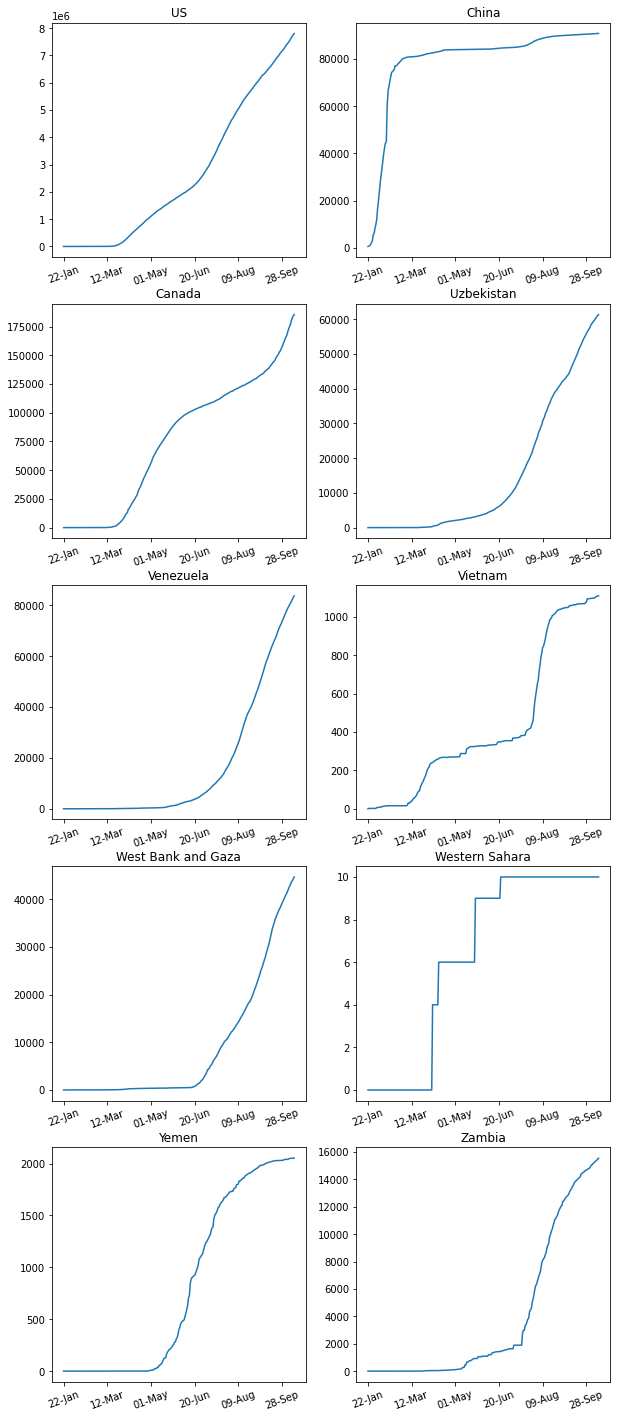

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure( figsize = (10,25))
countries = ['US', 'China', 'Canada', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia']
for i, country in  enumerate(countries):
    # print(country)
    plt.subplot(5, 2, i + 1)
    times = [0,50,100,150,200,250]
    plt.xticks(times, cases_raw.columns[times], rotation = 20)
    values = cases_raw.loc[country].values
    # print(values.shape) 
    plt.plot(values)
    plt.title(country)
plt.show()

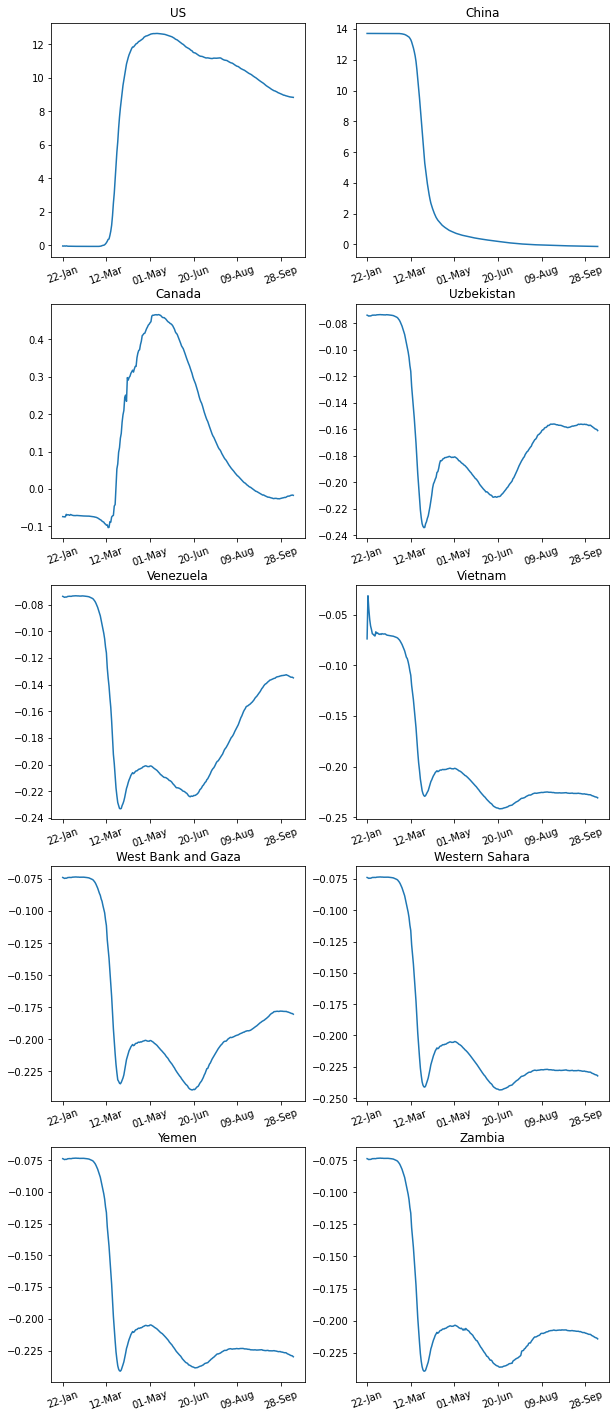

In [ ]:
#standardize
from sklearn.preprocessing import StandardScaler
import numpy as np
std_values = StandardScaler().fit_transform(cases_raw)

indexs = np.array(cases_raw.index)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure( figsize = (10,25))
countries = ['US', 'China', 'Canada', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia']
for i, country in  enumerate(countries):
    plt.subplot(5, 2, i + 1)
    times = [0,50,100,150,200,250]
    plt.xticks(times, cases_raw.columns[times], rotation = 20)
    idx = np.where(indexs == country)[0][0]
    values = std_values[idx]
    plt.plot(values)
    plt.title(country)
plt.show()

### The trend in US: NO change before March, and then rapidly increasing ,  finaly slowly decreasing form MAY. The trend in China: No change at first, then rapidly decreasing, finally slowiy decrasing. The trend in Canada: No change before March, then rapidly increasing, get peak around MAY, and then rapidly decreasing, slowly decreasing. 
### Going up or down of the curve represents the Larger or smaller proportion of the cases reported in the world.
### Negative/Postive value present smaller/greater than mean of cases repoted in the world.

# Part 2: Applying PCA

In [ ]:
std_values.shape

(189, 265)

In [ ]:
# print(std_values.shape)
n, m = std_values.shape
# Compute covariance matrix
C = np.cov(std_values.T)
# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eig(C) 
# print ("Eig Vec:\n ",eigenVectors, " \n Eig Val: \n", eigenValues)
#q2
#descending order of eigen valuse
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]
#see total values, the see percentage, see how many variance is covered
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)


/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


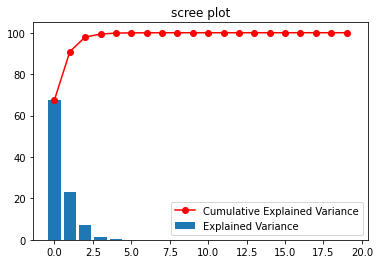

At least 4 Pcs cover 99\% of the dataset's variance


In [ ]:
plt.bar(range(20), expVar[0:20], label='Explained Variance')
plt.plot(cumExpVar[0:20], 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.title('scree plot')
plt.show()
#q4
N = np.where(cumExpVar >= 99.0)[0][0] + 1
print("At least {} Pcs cover 99\% of the dataset's variance".format(N))

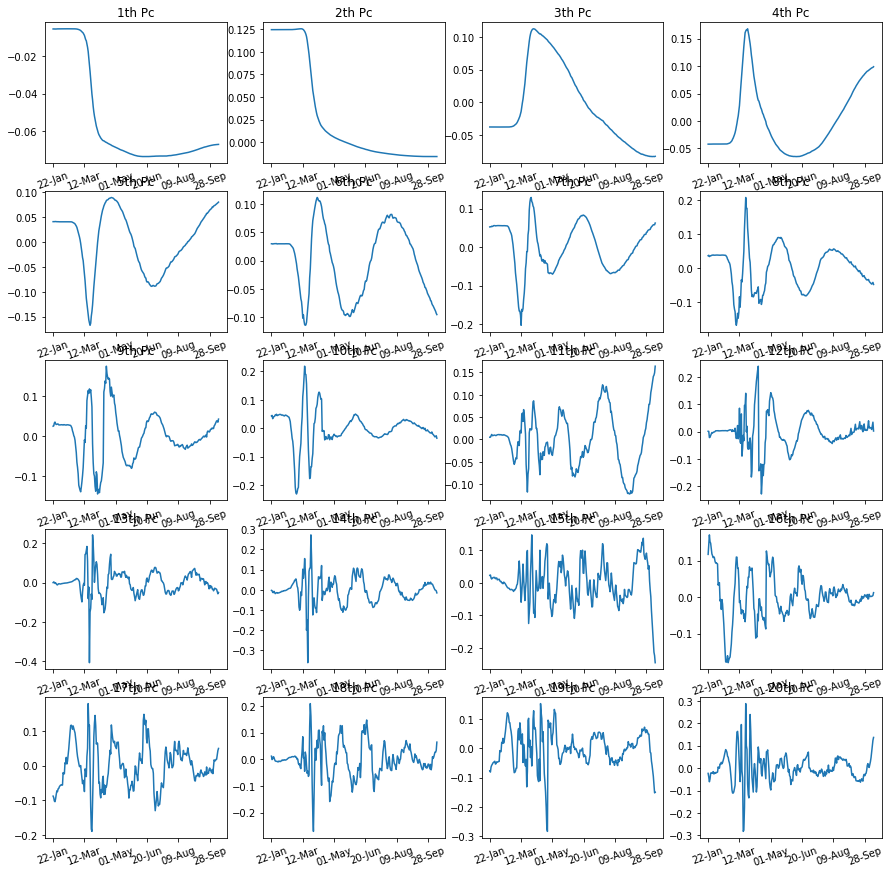

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure( figsize = (15,15))
for i in range(20):
    plt.subplot(5,4, i + 1)
    times = [0,50,100,150,200,250]
    plt.xticks(times, cases_raw.columns[times], rotation = 20)
    plt.plot( eigenVectors[:,i])
    plt.title( '{}th Pc'.format(i+1))
plt.show()

# Part 3:

In [ ]:
from sklearn.metrics import mean_squared_error
def part3(country, indexs = np.array(cases_raw.index), values = cases_raw.values, bounds = [1,0.1,0.01]):
    std_values = StandardScaler().fit_transform( values )
    n, m = std_values.shape
    C = np.cov(std_values.T)
    eigenValues, eigenVectors = np.linalg.eig(C) 
    args = (-eigenValues).argsort()
    eigenValues = eigenValues[args]
    eigenVectors = eigenVectors[:, args].astype(np.float)
    idx = np.where(indexs == country)[0][0]
    X_std = std_values[idx]
    # print(std_values[0,:20])
    recs = []
    ress = []
    rmses = []
    for PC_count in range(1,11 ):
        W = eigenVectors[:, 0:PC_count]
        projX = np.dot(X_std.reshape(1,-1), W)
        # Reconstruction
        ReconX = np.dot(projX, W.T)
        recs.append(ReconX.reshape(-1))
        #residual error of reconstruction
        ress.append( ReconX.reshape(-1) - X_std)
        #RMSE
        rmse =  mean_squared_error( X_std, ReconX.reshape(-1)) ** 0.5
        rmses.append(rmse)
    # plot
    plt.figure()
    times = [0,50,100,150,200,250]
    plt.xticks(times, cases_raw.columns[times], rotation = 20)
    plt.plot(X_std)
    plt.title('standardized time-series')
    plt.figure(figsize = (20,4))
    for i in range(10): #plot reconstruction
        times = [0,50,100,150,200,250]
        plt.xticks(times, cases_raw.columns[times], rotation = 20)
        plt.plot(recs[i], label= '{}th Pc'.format(i+1))
        plt.legend('1234567890')
        plt.title('Reconstruction of first one to first {} Pcs'.format( i + 1 ))
    plt.figure(figsize = (20,4))
    for i in range(10): #plot residuals
        #plt.subplot(1,10, i + 1)
        times = [0,50,100,150,200,250]
        plt.xticks(times, cases_raw.columns[times], rotation = 20)
        plt.plot(ress[i], label= '{}th Pc'.format(i+1))
        plt.legend('1234567890')
        plt.title('Residuals of first one to first {} Pcs'.format( i + 1 ))
   
    plt.figure ()
    plt.plot(rmses)
    plt.title('RMSE')
    rmses = np.array(rmses)
    for bound in bounds:
        M = np.where(rmses < bound)[0][0] + 1
        print('At least {} Pcs for RMSE < {}'.format( M, bound))

At least 2 Pcs for RMSE < 1
At least 4 Pcs for RMSE < 0.1
At least 5 Pcs for RMSE < 0.01


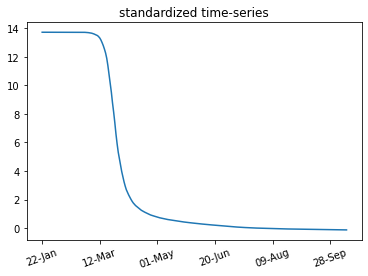

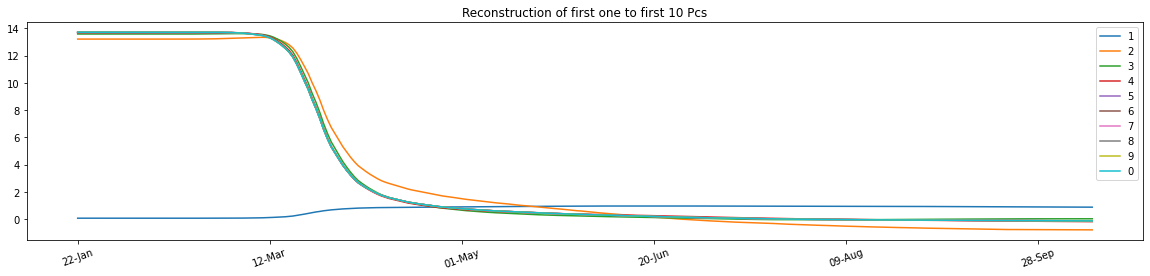

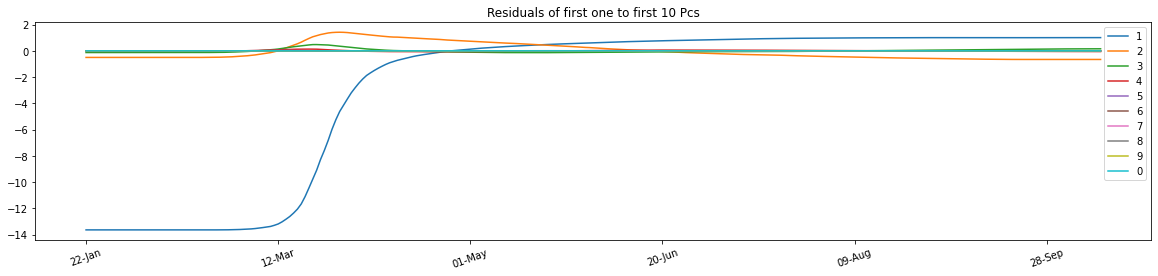

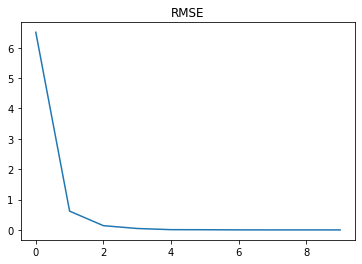

In [ ]:
part3('China')

At least 3 Pcs for RMSE < 1
At least 5 Pcs for RMSE < 0.1
At least 8 Pcs for RMSE < 0.01


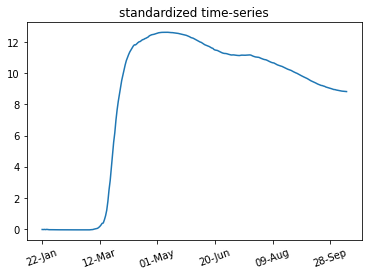

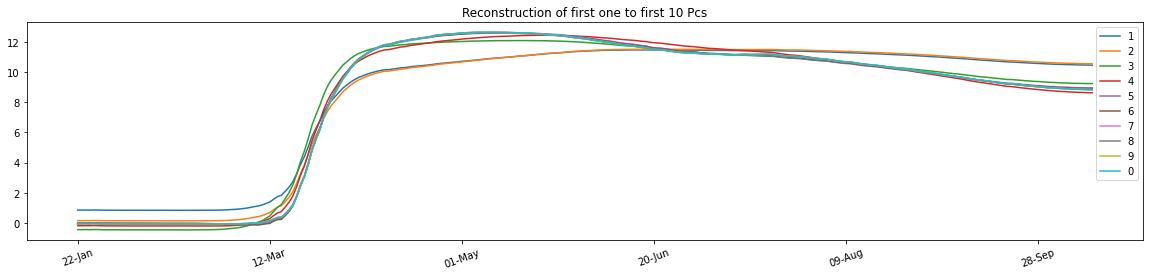

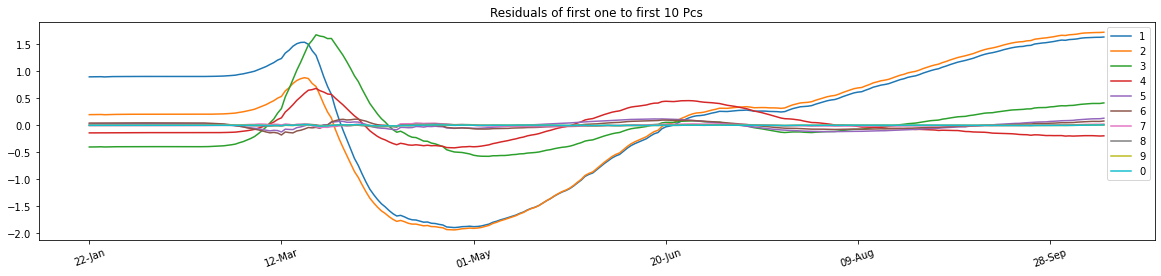

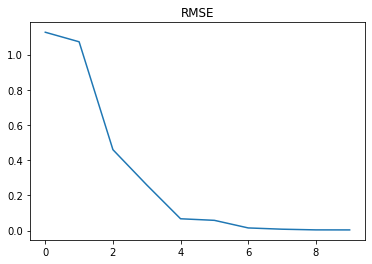

In [ ]:
part3('US')

At least 1 Pcs for RMSE < 1
At least 3 Pcs for RMSE < 0.1
At least 7 Pcs for RMSE < 0.01


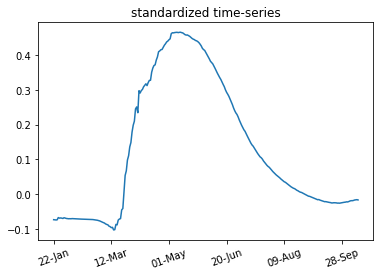

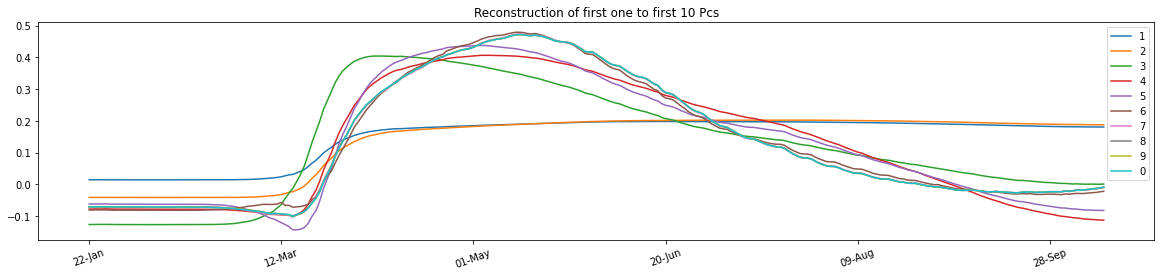

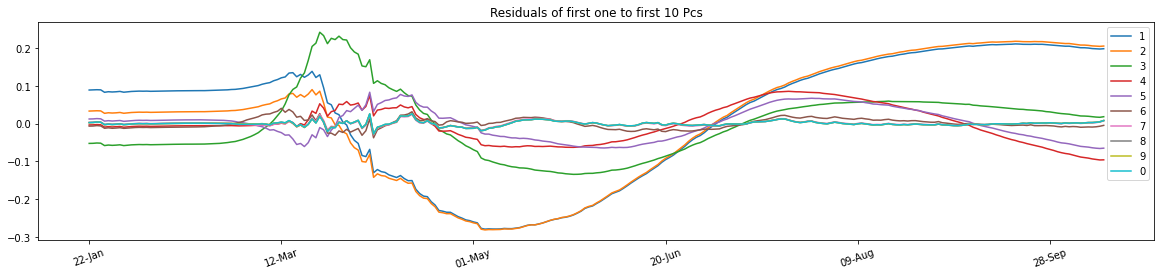

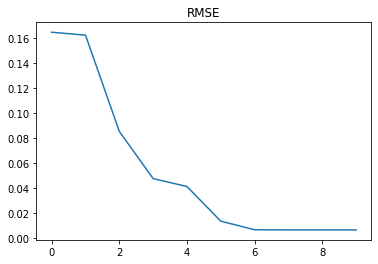

In [ ]:
part3('Canada')

# Part 4: analysis on death cases 



In [ ]:
import pandas as pd
death_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Dead.csv',
    index_col=0,
    thousands=','
)

In [ ]:
death_raw.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Uruguay', 'US', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=189)

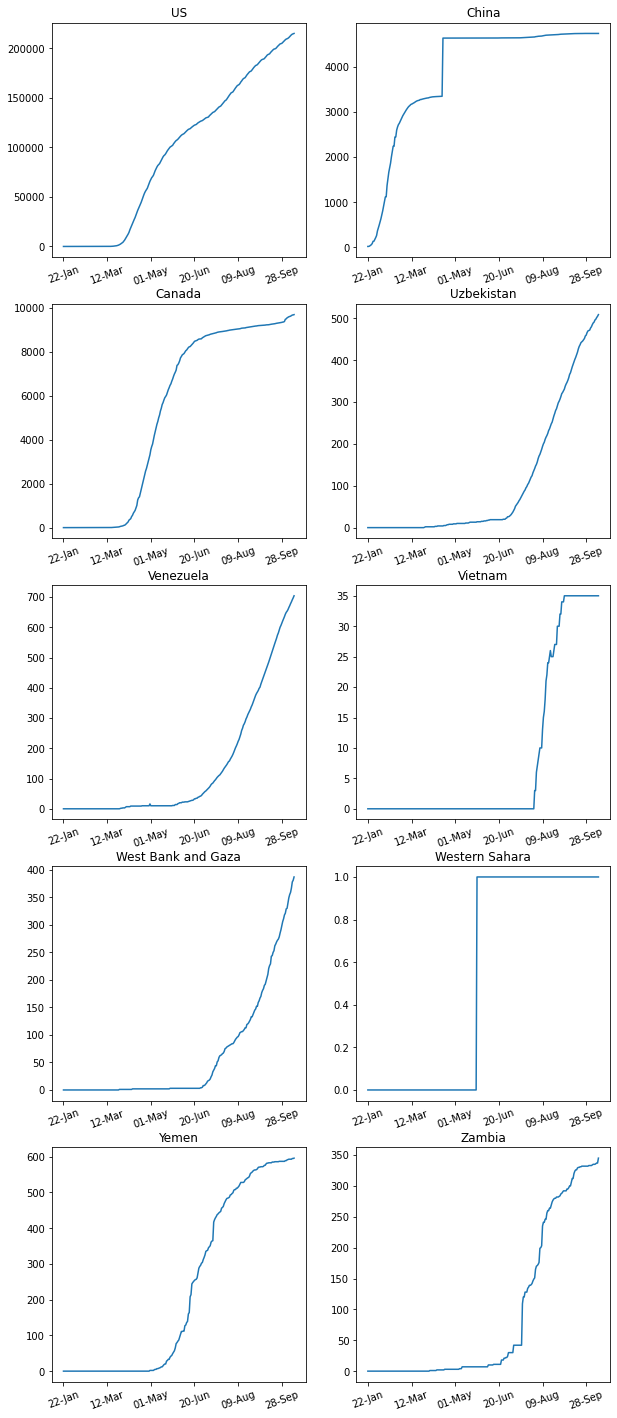

In [ ]:
plt.figure(figsize = (10,25))
countries = ['US', 'China', 'Canada', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia']
for i, country in  enumerate(countries):
    plt.subplot(5, 2, i + 1)
    times = [0,50,100,150,200,250]
    plt.xticks(times, death_raw.columns[times], rotation = 20)
    values = death_raw.loc[country].values
    plt.plot(values)
    plt.title(country)
plt.show()

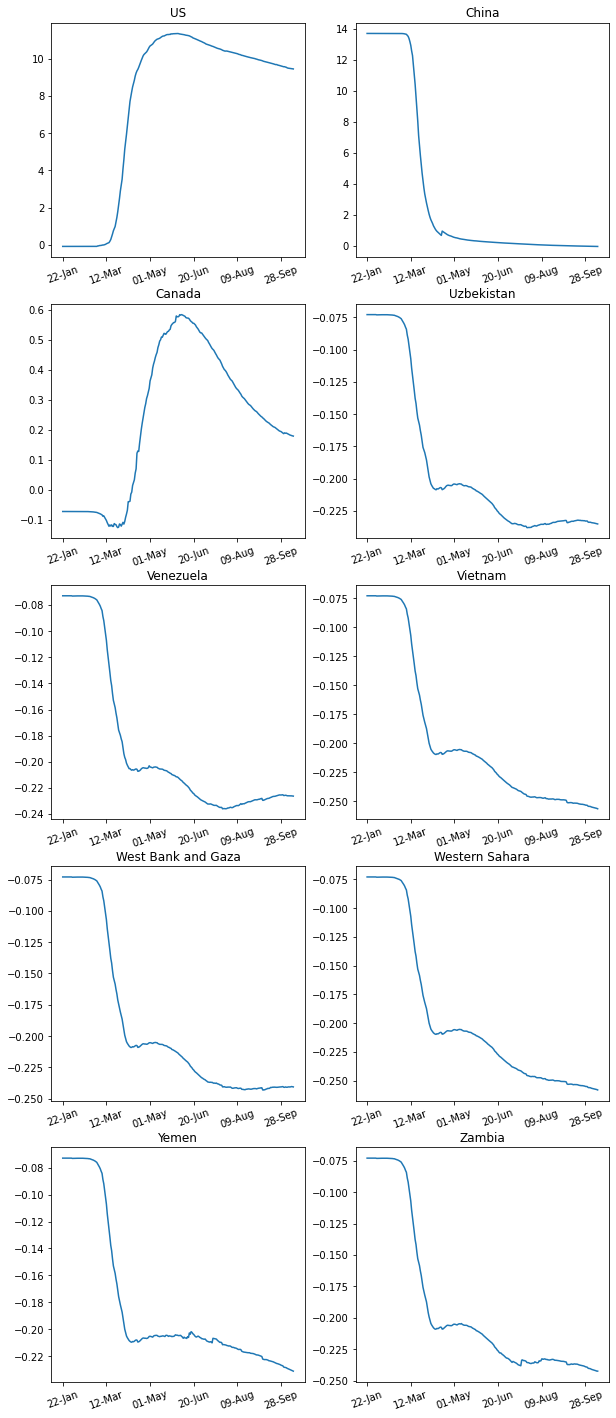

In [ ]:
#standardize
std_values = StandardScaler().fit_transform(death_raw)

indexs = np.array(death_raw.index)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10,25))
countries = ['US', 'China', 'Canada', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia']
for i, country in  enumerate(countries):
    plt.subplot(5, 2, i + 1)
    idx = np.where(indexs == country)[0][0]
    values = std_values[idx]
    times = [0,50,100,150,200,250]
    plt.xticks(times, death_raw.columns[times], rotation = 20)
    plt.plot(values)
    plt.title(country)
plt.show()

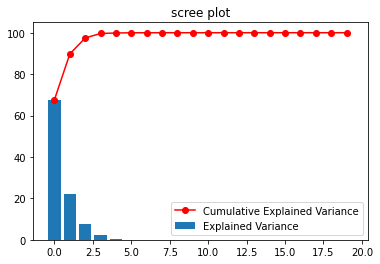

At least 4 Pcs cover 99\% of the dataset's variance


In [ ]:
# print( std_values.shape )
n, m = std_values.shape
# Compute covariance matrix
C = np.cov(std_values.T)
# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eig(C) 
#descending order of eigen valuse
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]
#see total values, the see percentage, see how many variance is covered
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
#scree plot
plt.bar(range(20), expVar[0:20], label='Explained Variance')
plt.plot(cumExpVar[0:20], 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.title('scree plot')
plt.show()

N = np.where(cumExpVar >= 99.0)[0][0] + 1
print("At least {} Pcs cover 99\% of the dataset's variance".format(N))

At least 2 Pcs for RMSE < 1
At least 4 Pcs for RMSE < 0.1
At least 5 Pcs for RMSE < 0.01


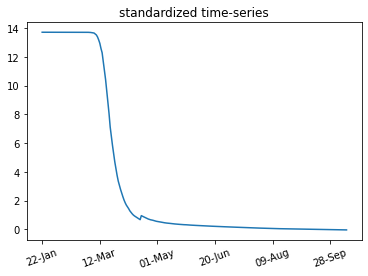

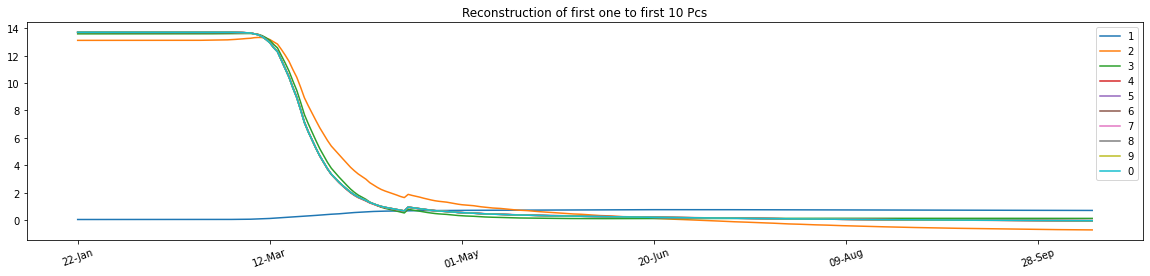

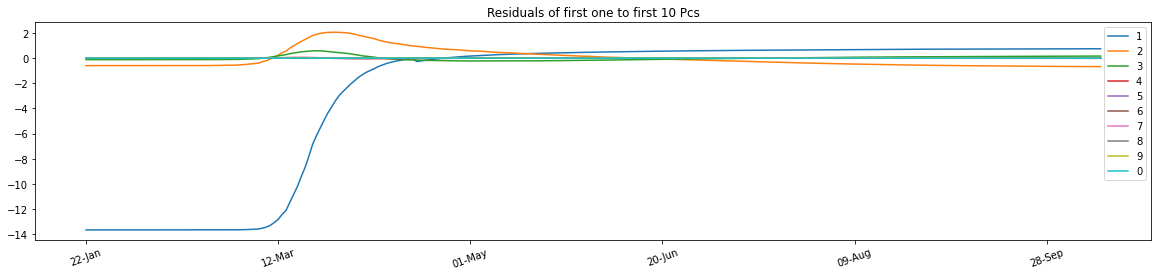

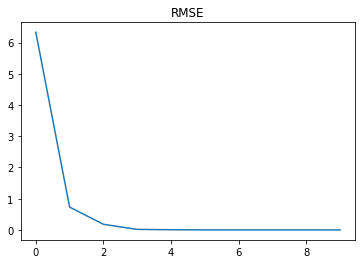

In [ ]:
part3('China', indexs = np.array( death_raw.index ), values = death_raw.values, bounds = [1,0.1,0.01])

At least 2 Pcs for RMSE < 1
At least 6 Pcs for RMSE < 0.1
At least 8 Pcs for RMSE < 0.01


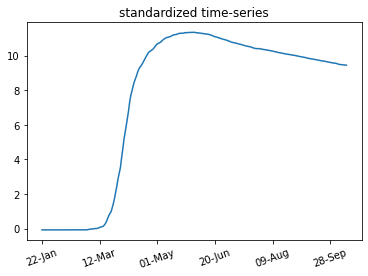

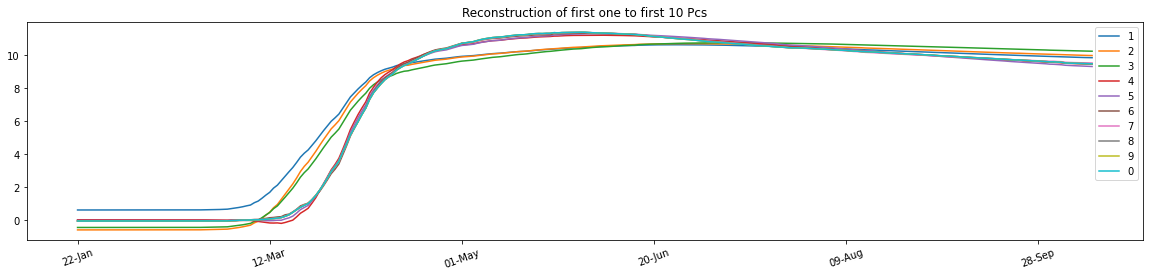

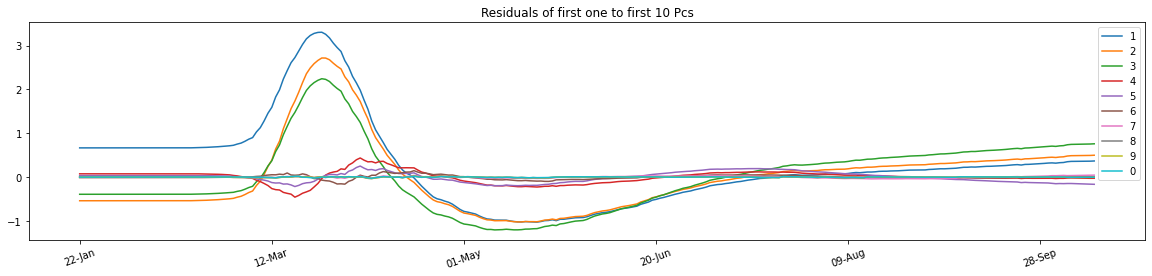

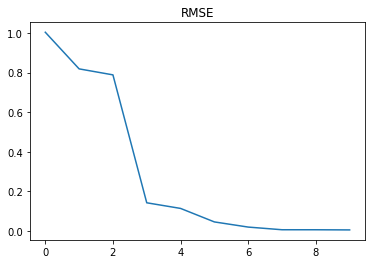

In [ ]:
part3('US', indexs = np.array( death_raw.index ), values = death_raw.values, bounds = [1,0.1,0.01])

At least 1 Pcs for RMSE < 1
At least 5 Pcs for RMSE < 0.1


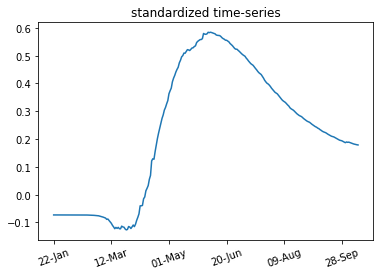

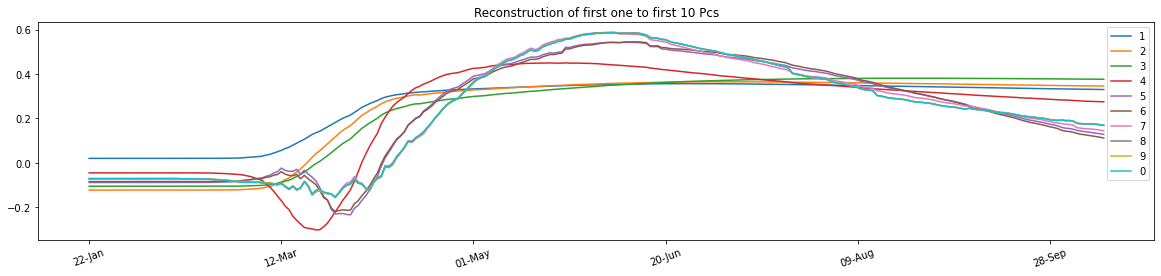

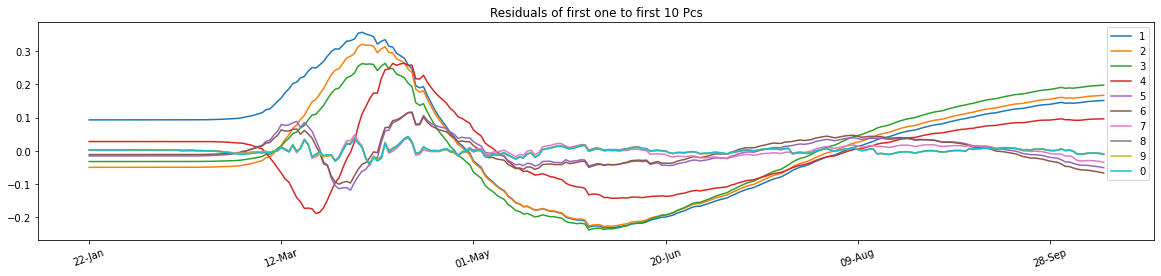

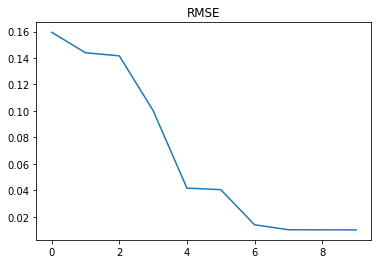

In [ ]:
part3('Canada', indexs = np.array( death_raw.index ), values = death_raw.values, bounds = [1,0.1])

For Canada, RMSE could not be less than 0.01m, probably because I took only 10 pc. 

# Part 5: MNIST dataset 
MNIST is a dataset for hand-written digits recognition. 
Each image in MNIST has 28x28 pixels which can be represented in the form of an array with 784 elements. In this part we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.


In [ ]:
import sklearn 
sklearn.__version__
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data[0:1000]
y = mnist.target[0:1000]

In [ ]:
x.shape

(1000, 784)

Label is: 4


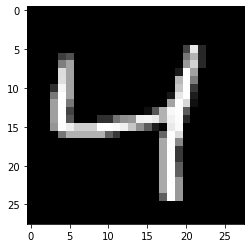

In [ ]:
x.shape
import matplotlib.pyplot as plt 
plt.gray() 
plt.imshow(x[2].reshape(28,28)) 
print ("Label is:", y[2])
plt.show() 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


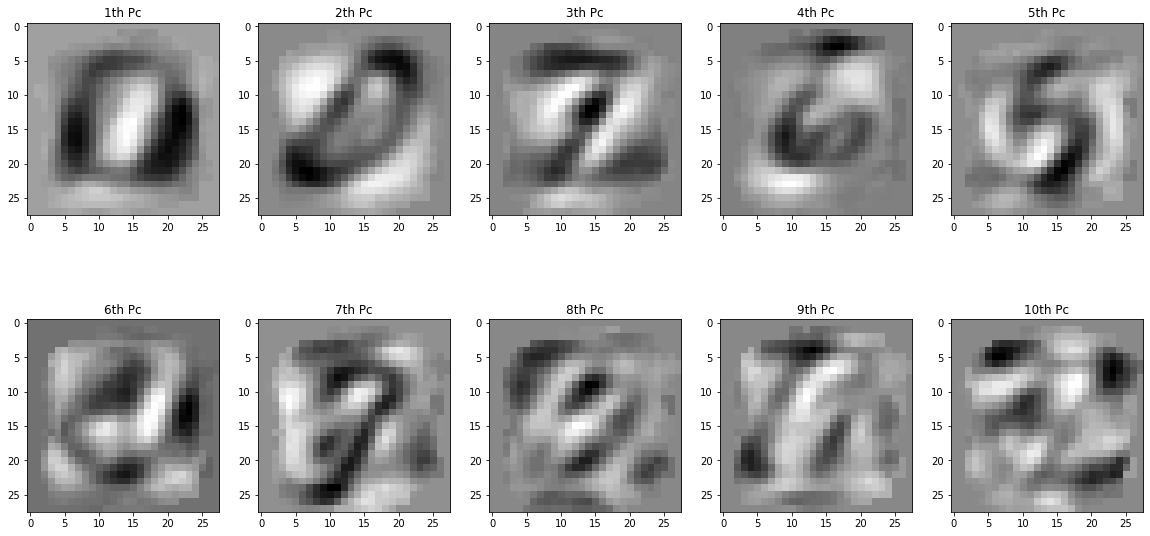

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
def img_show( img ):
    plt.gray() 
    plt.imshow(img.reshape(28,28)) 
std_values = StandardScaler().fit_transform(x)
n, m = std_values.shape
#covariance
C = np.cov(std_values.T) 
print(C)
# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eig(C)
#descanding 
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args].astype(np.float)

plt.figure(figsize = (20,10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    img_show(eigenVectors[:,i])
    plt.title('{}th Pc'.format(i + 1))


#The distribution of black and white pixels is becoming more and more meaningless to humans, as the number of component increases

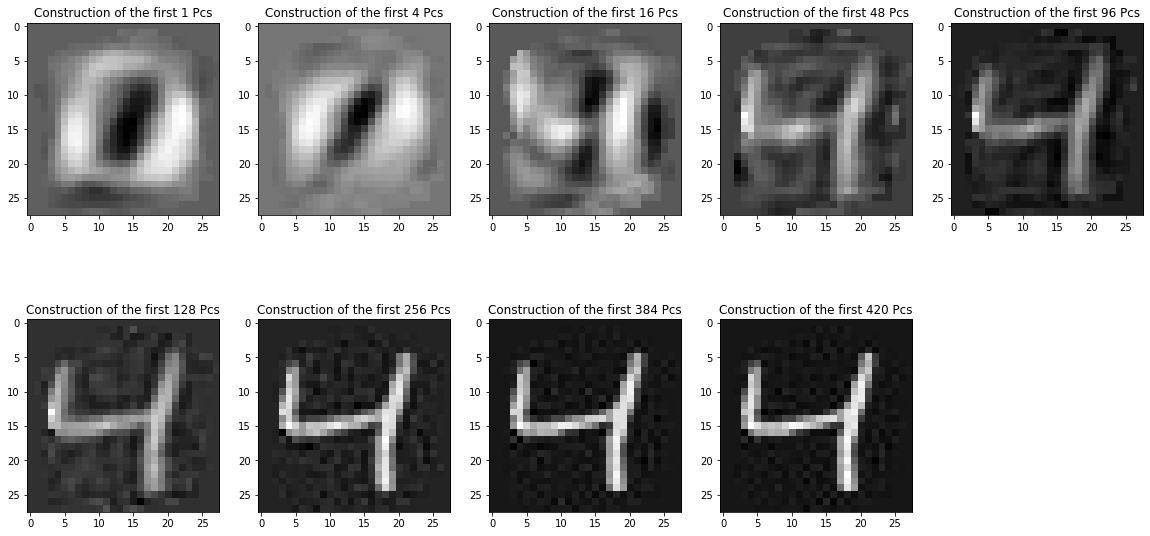

In [ ]:
def construct(PC_count):
    W = eigenVectors[:, 0:PC_count]
    projX = np.dot(x[2].reshape(1,-1), W)
    # Reconstruction
    ReconX = np.dot(projX, W.T)
    img_show(ReconX)
    
plt.figure(figsize = (20,10))
for i,PC_count in enumerate([1,4,16,48,96,128,256, 384, 420]):
    plt.subplot(2,5, i + 1)
    construct(PC_count)
    plt.title("Construction of the first {} Pcs".format(PC_count))

In [ ]:
(28*28*1000)/(1000*48+784*48)

9.155455904334827